<a href="https://colab.research.google.com/github/ramirezzzluisss/IS4487/blob/main/Module4_Script_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [4]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

Mounted at /content/gdrive


In [5]:
#look at the top rows
df.head(10) 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,$7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,$111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,$59.99,2019-09,September


In [6]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [7]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [11]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna(subset=['postal_code','order_date','quantity']) 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9120 non-null   int64  
 1   customer_name     9120 non-null   object 
 2   address_line_1    9010 non-null   object 
 3   city              9091 non-null   object 
 4   state_province    9120 non-null   object 
 5   postal_code       9120 non-null   float64
 6   order_id          9120 non-null   int64  
 7   order_date        9120 non-null   object 
 8   customer_id.1     9120 non-null   int64  
 9   order_id.1        9120 non-null   int64  
 10  product_id        9120 non-null   int64  
 11  quantity          9120 non-null   float64
 12  product_id.1      9120 non-null   int64  
 13  product_name      9120 non-null   object 
 14  product_price     9120 non-null   object 
 15  total_amount      9120 non-null   object 
 16  order_year_month  9120 non-null   object 


In [30]:
## clean total amount column from $ and , signs to be able to sum it when grouping
df_clean['total_amount'] = df_clean['total_amount'].str.replace("$", "", regex=True)
df_clean['total_amount'] = df_clean['total_amount'].str.replace(",", "", regex=True)
df_clean['total_amount'] = df_clean['total_amount'].astype(float)

<ipython-input-30-f821aa1656d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['total_amount'].str.replace("$", "", regex=True)
<ipython-input-30-f821aa1656d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['total_amount'].str.replace(",", "", regex=True)
<ipython-input-30-f821aa1656d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [29]:
df_clean.head(10)

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,59.99,2019-09,September


# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [36]:
## plot the total number of order and revenues by states

## by orders 
df_ordersbystate = df_clean.groupby(['state_province'])['order_id'].count()
print(df_ordersbystate)

## by revenue
df_revenuebystate = df_clean.groupby(['state_province'])['total_amount'].sum()
print(df_revenuebystate)

state_province
AK                            39
AL                           162
AR                            20
AZ                           127
Alabama                       41
                            ... 
WY                            16
Washington                    62
West Virginia                 22
Wisconsin                     24
Wyoming                        2
Name: order_id, Length: 92, dtype: int64
state_province
AK                           14843.81
AL                           56644.48
AR                            7902.70
AZ                           46757.28
Alabama                      15372.46
                               ...   
WY                            3434.54
Washington                   16004.70
West Virginia                 6240.21
Wisconsin                     6747.64
Wyoming                        835.97
Name: total_amount, Length: 92, dtype: float64


<AxesSubplot:xlabel='state_province'>

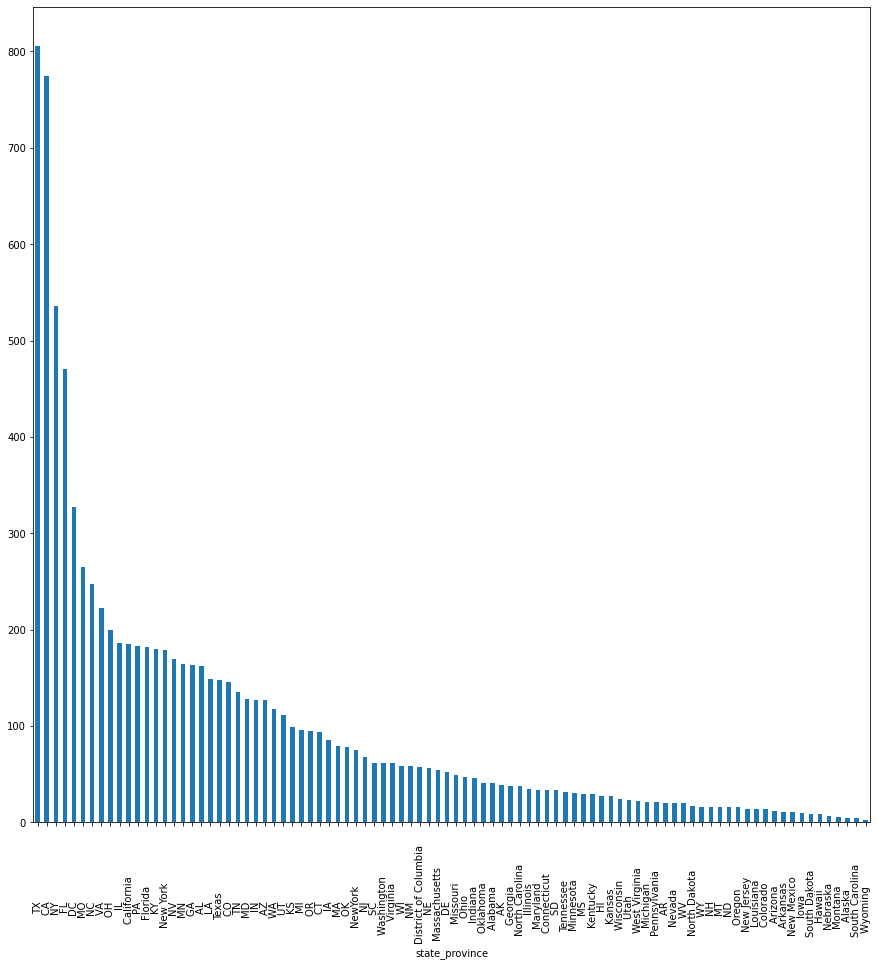

In [37]:
## plot orders by state
df_ordersbystate.sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

<AxesSubplot:xlabel='state_province'>

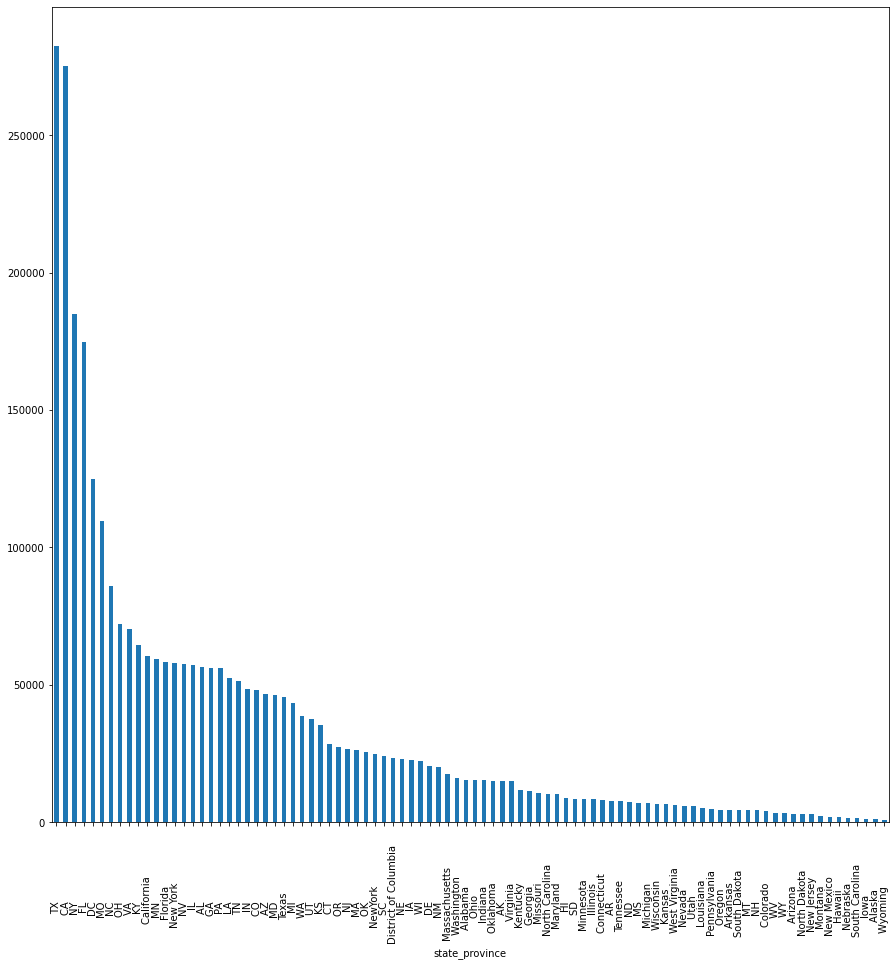

In [38]:
## plot revenue by state
df_revenuebystate.sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

In [ ]:
#Get distinct values
df_clean['college'].unique() 

In [ ]:
df_clean['reported_satisfaction'] .unique()

In [ ]:
df_clean['reported_usage_level'].unique()

In [ ]:
df_clean['considering_change_of_plan'].unique()

In [ ]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1" 
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int') 
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int') 
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int') 
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float') 

df_clean.head(10) 

# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [ ]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [ ]:
#Add new field with binary value for leave  
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')  
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()
